In [2]:
# Ahmet ÇÖLKESEN - Çağrı ÇAKIROĞLU

import pandas as pd
import numpy as np

# Import the Data Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Import the Scikit-Learn packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import shap
import dtale
from imblearn.over_sampling import SMOTE

# Import the GUI packages
import tkinter as tk
from tkinter import ttk

# Import the custom classes
from person import Person

In [3]:
# Import the Data
data =pd.read_csv("output_data.csv")

data = data.drop(columns=["Unnamed: 0"])

data.head()

,Emp_Id,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,51,0,6,2,1,131160,1.0,11,0,...,0,0,0,0,0,0,0,0,1,0
1,2,31,1,10,1,1,41890,0.0,23,1,...,0,0,0,0,1,0,0,0,0,1
2,3,32,0,17,4,4,193280,1.0,15,3,...,0,0,0,0,0,1,0,0,1,0
3,4,38,0,2,5,3,83210,3.0,11,3,...,0,0,0,0,0,0,0,0,1,0
4,5,32,0,10,1,1,23420,4.0,12,2,...,0,0,0,0,0,1,0,0,0,1


In [4]:
# Create a copy of the data
copied_data = data.copy()
copied_data_for_analysis= data.copy()

In [5]:
# Show the data types of each column
print("\n".join(data.columns))

Emp_Id
Age
Attrition
DistanceFromHome
Education
JobLevel
MonthlyIncome
NumCompaniesWorked
PercentSalaryHike
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsSinceLastPromotion
YearsWithCurrManager
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance
JobInvolvement
PerformanceRating
Q1_Longest_Streak_OUT
Q2_Longest_Streak_OUT
Q3_Longest_Streak_OUT
Q4_Longest_Streak_OUT
Q1_Longest_Streak_IN
Q2_Longest_Streak_IN
Q3_Longest_Streak_IN
Q4_Longest_Streak_IN
BusinessTravel_Non-Travel
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Human Resources
Department_Research & Development
Department_Sales
EducationField_Human Resources
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
Gender_Female
Gender_Male
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director


In [6]:
persons = []

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Create a new Person object with the data from the row
    person = Person(
        emp_id=row['Emp_Id'],
        age=row['Age'],
        attrition=row['Attrition'],
        distance_from_home=row['DistanceFromHome'],
        education=row['Education'],
        job_level=row['JobLevel'],
        monthly_income=row['MonthlyIncome'],
        num_companies_worked=row['NumCompaniesWorked'],
        percent_salary_hike=row['PercentSalaryHike'],
        stock_option_level=row['StockOptionLevel'],
        total_working_years=row['TotalWorkingYears'],
        training_times_last_year=row['TrainingTimesLastYear'],
        years_at_company=row['YearsAtCompany'],
        years_since_last_promotion=row['YearsSinceLastPromotion'],
        years_with_curr_manager=row['YearsWithCurrManager'],
        environment_satisfaction=row['EnvironmentSatisfaction'],
        job_satisfaction=row['JobSatisfaction'],
        work_life_balance=row['WorkLifeBalance'],
        job_involvement=row['JobInvolvement'],
        performance_rating=row['PerformanceRating'],
        q1_longest_streak_out=row['Q1_Longest_Streak_OUT'],
        q2_longest_streak_out=row['Q2_Longest_Streak_OUT'],
        q3_longest_streak_out=row['Q3_Longest_Streak_OUT'],
        q4_longest_streak_out=row['Q4_Longest_Streak_OUT'],
        q1_longest_streak_in=row['Q1_Longest_Streak_IN'],
        q2_longest_streak_in=row['Q2_Longest_Streak_IN'],
        q3_longest_streak_in=row['Q3_Longest_Streak_IN'],
        q4_longest_streak_in=row['Q4_Longest_Streak_IN'],
        business_travel_non_travel=row['BusinessTravel_Non-Travel'],
        business_travel_travel_frequently=row['BusinessTravel_Travel_Frequently'],
        business_travel_travel_rarely=row['BusinessTravel_Travel_Rarely'],
        department_human_resources=row['Department_Human Resources'],
        department_research_development=row['Department_Research & Development'],
        department_sales=row['Department_Sales'],
        education_field_human_resources=row['EducationField_Human Resources'],
        education_field_life_sciences=row['EducationField_Life Sciences'],
        education_field_marketing=row['EducationField_Marketing'],
        education_field_medical=row['EducationField_Medical'],
        education_field_other=row['EducationField_Other'],
        education_field_technical_degree=row['EducationField_Technical Degree'],
        gender_female=row['Gender_Female'],
        gender_male=row['Gender_Male'],
        job_role_healthcare_representative=row['JobRole_Healthcare Representative'],
        job_role_human_resources=row['JobRole_Human Resources'],
        job_role_laboratory_technician=row['JobRole_Laboratory Technician'],
        job_role_manager=row['JobRole_Manager'],
        job_role_manufacturing_director=row['JobRole_Manufacturing Director'],
        job_role_research_director=row['JobRole_Research Director'],
        job_role_research_scientist=row['JobRole_Research Scientist'],
        job_role_sales_executive=row['JobRole_Sales Executive'],
        job_role_sales_representative=row['JobRole_Sales Representative'],
        marital_status_divorced=row['MaritalStatus_Divorced'],
        marital_status_married=row['MaritalStatus_Married'],
        marital_status_single=row['MaritalStatus_Single']
    )
    # Add the new Person object to the list
    persons.append(person)


In [7]:
# Checking the values of the target variable
average_values = data[data['Attrition'] == 1].mean()
print(average_values.round(2))

Emp_Id                                2206.75
Age                                     33.69
Attrition                                1.00
DistanceFromHome                         9.04
Education                                2.88
JobLevel                                 2.03
MonthlyIncome                        61564.22
NumCompaniesWorked                       2.94
PercentSalaryHike                       15.50
StockOptionLevel                         0.78
TotalWorkingYears                        8.29
TrainingTimesLastYear                    2.66
YearsAtCompany                           5.16
YearsSinceLastPromotion                  1.97
YearsWithCurrManager                     2.87
EnvironmentSatisfaction                  2.47
JobSatisfaction                          2.47
WorkLifeBalance                          2.66
JobInvolvement                           2.71
PerformanceRating                        3.18
Q1_Longest_Streak_OUT                    1.06
Q2_Longest_Streak_OUT             

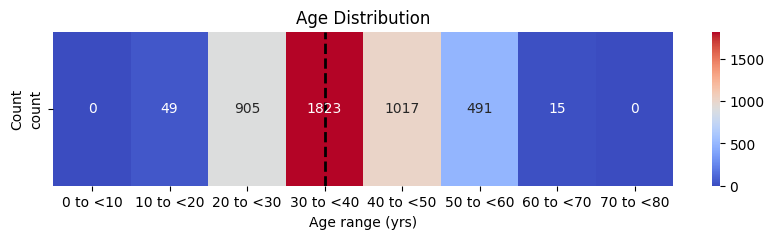

In [8]:
# Creating age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0 to <10', '10 to <20', '20 to <30', '30 to <40', '40 to <50', '50 to <60', '60 to <70', '70 to <80']
copied_data_for_analysis['age_group'] = pd.cut(copied_data_for_analysis['Age'], bins=age_bins, labels=labels, right=False)

# Creating a frequency table
age_distribution = copied_data_for_analysis['age_group'].value_counts().reindex(labels).fillna(0)
heatmap_data = pd.DataFrame(age_distribution).T

# Plotting the heatmap
plt.figure(figsize=(10, 2))
ax = sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="coolwarm")
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age range (yrs)')


bin_position = age_bins.index(next(b for b in age_bins if b > 33.7)) - 0.5
plt.axvline(x=bin_position, color='black', linestyle='--', linewidth=2)

# Show the plot with the vertical line
plt.show()

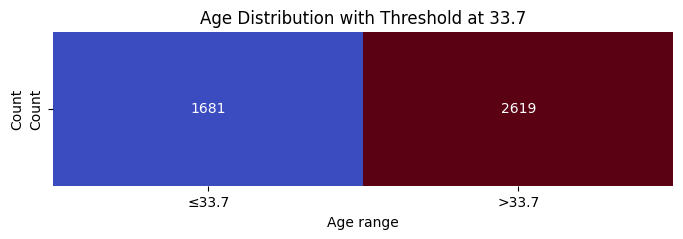

In [9]:
copied_data_for_analysis['age_bin'] = ['≤33.7' if x <= 33.7 else '>33.7' for x in data['Age']]

# Calculate counts for each bin
age_bin_counts = copied_data_for_analysis['age_bin'].value_counts().reindex(['≤33.7', '>33.7'])

# Prepare the data for the heatmap
heatmap_data = pd.DataFrame([age_bin_counts])
heatmap_data.index = ['Count']

# We'll create a custom colormap where the second bin is less bright
current_cmap = plt.cm.coolwarm
colors = current_cmap(np.arange(current_cmap.N))
colors[int(len(colors)/2):, :-1] *= 0.5  
custom_cmap = ListedColormap(colors)

# Plotting the heatmap
plt.figure(figsize=(8, 2))
ax = sns.heatmap(heatmap_data, annot=True, fmt="g", cmap=custom_cmap, cbar=False)
plt.title('Age Distribution with Threshold at 33.7')
plt.ylabel('Count')
plt.xlabel('Age range')

# Show the plot with the vertical line
plt.show()

In [10]:
print("\n".join(data.columns))

Emp_Id
Age
Attrition
DistanceFromHome
Education
JobLevel
MonthlyIncome
NumCompaniesWorked
PercentSalaryHike
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsSinceLastPromotion
YearsWithCurrManager
EnvironmentSatisfaction
JobSatisfaction
WorkLifeBalance
JobInvolvement
PerformanceRating
Q1_Longest_Streak_OUT
Q2_Longest_Streak_OUT
Q3_Longest_Streak_OUT
Q4_Longest_Streak_OUT
Q1_Longest_Streak_IN
Q2_Longest_Streak_IN
Q3_Longest_Streak_IN
Q4_Longest_Streak_IN
BusinessTravel_Non-Travel
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Human Resources
Department_Research & Development
Department_Sales
EducationField_Human Resources
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
Gender_Female
Gender_Male
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director


In [11]:
def set_style():
    style = ttk.Style()
    style.theme_use('clam')  # Use a theme for better looking widgets

    # Customize specific widget styles
    style.configure('TButton', font=('Helvetica', 12), borderwidth='4')
    style.configure('TLabel', font=('Helvetica', 12), background='light gray')
    style.configure('TCombobox', font=('Helvetica', 12))

# Function to perform analysis and plot
def analyze_data(job_role, canvas_list):
    for canvas in canvas_list:
        for item in canvas.get_tk_widget().find_all():
            canvas.get_tk_widget().delete(item)
            canvas.get_tk_widget().destroy()
            canvas_list.remove(canvas)

    # Filter data for the selected job role
    filtered_data = data[data[job_role] == 1]

    # Calculate correlation with Attrition and sort in descending order
    correlation = filtered_data.corr()['Attrition'].sort_values(ascending=False)

    # Select top 5 positive correlations (excluding 'Attrition' itself)
    top_correlations = correlation.drop('Attrition').head(5)

    # Display results in text
    result_label.config(text=top_correlations)

    # Plotting the bar plot
    fig, ax = plt.subplots()
    top_correlations.plot(kind='bar', ax=ax)
    
    # Format the title to occupy multiple lines
    title_text = "Top 5 Positive Correlations with Attrition for:\n{}".format(job_role)
    ax.set_title(title_text, fontsize=10)
    ax.set_ylabel("Correlation Coefficient")
    ax.set_xlabel("Factors")
    plt.tight_layout()

    # Embedding plot in Tkinter
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    canvas.draw()
    canvas_list.append(canvas)


# GUI setup
root = tk.Tk()
root.title("Attrition Analysis")

ttk.Label(root, text="Select a job role to analyze:").pack()

# Dropdown menu for job roles
job_roles = [col for col in data.columns if 'JobRole_' in col]
job_role_var = tk.StringVar()

job_role_dropdown = ttk.Combobox(root, textvariable=job_role_var, values=job_roles)
job_role_dropdown.pack()

canvas_list = []
# Button to perform analysis
analyze_button = tk.Button(root, text="Analyze", command=lambda: analyze_data(job_role_var.get(), canvas_list))
analyze_button.pack()

# Label to display results
result_label = tk.Label(root, text="", wraplength=400)
result_label.pack()

root.minsize(500, 100)
root.mainloop()


In [12]:
copied_data = data.copy()

In [13]:
# Splitting the data into training and testing sets
X = copied_data.drop('Attrition', axis=1)
y = copied_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Resampling with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Creating a pipeline with scaling, feature selection, and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(estimator=LogisticRegression(), n_features_to_select=10)),
    ('classifier', LogisticRegression())
])

# Hyperparameter tuning
parameters = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_model = grid_search.best_estimator_

# Predictions
predictions = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

C:\Users\acolk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\acolk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x6

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       718
           1       0.52      0.10      0.17       142

    accuracy                           0.84       860
   macro avg       0.68      0.54      0.54       860
weighted avg       0.79      0.84      0.79       860

Confusion Matrix:
 [[705  13]
 [128  14]]
ROC AUC Score: 0.6587302365726392


In [14]:
# Splitting the data into training and testing sets
X = copied_data.drop('Attrition', axis=1)
y = copied_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Reset the index of X_test to avoid indexing issues
X_test = X_test.reset_index(drop=True)


# Resampling with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train a logistic regression model on the full set of features
lr_model_full = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues
lr_model_full.fit(X_train_res, y_train_res)


# Create a SHAP explainer using the full model
explainer_full = shap.Explainer(lr_model_full, X_train_res)

# Calculate SHAP values for the test set
shap_values_full = explainer_full(X_test)

# Initialize a DataFrame to store predictions and SHAP values
predictions_df = pd.DataFrame(columns=['Emp_Id', 'Attrition_Probability', 'Top_SHAP_Features'])
predictions_features_df = pd.DataFrame()
rows_list = []
# Iterate over each row in the test set
for index, row in X_test.iterrows():
    # Create a DataFrame for the row with the correct column names
    # This is crucial to match the training data format
    row_df = pd.DataFrame([row], columns=X_train.columns)

    # Predict the probability for this individual using the row DataFrame
    probability = lr_model_full.predict_proba(row_df)[0, 1]

    # Get the employee ID
    emp_id = copied_data[copied_data.index == index]['Emp_Id'].iloc[0]

    # Get SHAP values for the current instance
    instance_shap_values = shap_values_full[index].values

    # Sort features by their SHAP value's absolute magnitude in descending order
    top_features_indices = np.argsort(np.abs(instance_shap_values))[::-1][:5]
    top_features = [(X_train.columns[i], instance_shap_values[i]) for i in top_features_indices]

    # Get the employee ID
    emp_id = copied_data[copied_data['Emp_Id'] == emp_id]['Emp_Id'].iloc[0]

    # Get the actual values of the top features from the non-normalized data (copied_data)
    actual_feature_values = copied_data.loc[copied_data['Emp_Id'] == emp_id, [feat for feat, _ in top_features]].iloc[0]

    # Combine the SHAP values and actual values into a formatted string
    combined_features = '\n'.join([
        f"{feat}: Value: {actual_val} Effect on Attrition (%): {shap_val:.2%}" 
        for (feat, shap_val), actual_val in zip(top_features, actual_feature_values)
    ])

    # Create a new row for the DataFrame
    new_row = {
        'Emp_Id': emp_id,
        'Attrition_Probability': probability,
        'Combined_Features': combined_features
    }
    # Append the new row to the DataFrame
    rows_list.append(new_row)
predictions_features_df = pd.concat([predictions_features_df, pd.DataFrame(rows_list)], ignore_index=True)

predictions_features_df['Attrition_Probability'] = predictions_features_df['Attrition_Probability'].apply(lambda x: f"{x:.2%}")

# Set 'Emp_Id' as the index of the DataFrame
predictions_features_df.set_index('Emp_Id', inplace=True)

# Display the predictions with combined feature effects and actual values
print(predictions_features_df)

       Attrition_Probability  \
Emp_Id                         
1                     53.36%   
2                     50.40%   
3                     37.33%   
4                     43.21%   
5                     47.84%   
...                      ...   
885                   27.40%   
886                   59.73%   
887                   48.13%   
888                   49.39%   
889                   50.30%   

                                        Combined_Features  
Emp_Id                                                     
1       TotalWorkingYears: Value: 1.0 Effect on Attrit...  
2       TotalWorkingYears: Value: 6.0 Effect on Attrit...  
3       YearsAtCompany: Value: 5.0 Effect on Attrition...  
4       TotalWorkingYears: Value: 13.0 Effect on Attri...  
5       YearsAtCompany: Value: 6.0 Effect on Attrition...  
...                                                   ...  
885     TotalWorkingYears: Value: 10.0 Effect on Attri...  
886     TotalWorkingYears: Value: 10.0 Effe

In [15]:
# Convert 'Attrition_Probability' from percentage strings to floats
predictions_features_df['Attrition_Probability'] = predictions_features_df['Attrition_Probability'].str.rstrip('%').astype('float') / 100.0

# Sort the DataFrame by 'Attrition_Probability'
sorted_predictions_df = predictions_features_df.sort_values('Attrition_Probability', ascending=False)

# Convert 'Attrition_Probability' back to percentage strings if you want to display it as such
sorted_predictions_df['Attrition_Probability'] = sorted_predictions_df['Attrition_Probability'].apply(lambda x: f"{x:.2%}")

# Assuming 'predictions_df' is your DataFrame
d = dtale.show(sorted_predictions_df)
d.open_browser()

In [19]:
pathh="attrition.xlsx"
sorted_predictions_df.to_excel(pathh)

In [20]:
def get_fixed_features(data):
    if data.empty:
        raise ValueError("Input DataFrame is empty")

    # Check for required columns
    required_columns = ['Age', 'Gender_Male', 'PerformanceRating']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame")

    # Extract features
    age_group = int(data['Age'].iloc[0] / 10)
    gender_male = data['Gender_Male'].iloc[0]
    performance = data['PerformanceRating'].iloc[0]

    return age_group, gender_male, performance

In [21]:
def filter_dataframe(age, gender, performance, df):
    filtered_df = df[((df['Age']/ 10) == age) & (df['Gender_Male'] == gender) & (df['PerformanceRating'] == performance) & (df['Attrition'] == 0)]
    return filtered_df
def get_median_features(features, df):
    medians = {}
    for feature in features:
        if feature in df.columns:
            medians[feature] = df[feature].median()
        else:
            medians[feature] = None 

    return medians

In [22]:
def format_comparison(actual_values, median_values, attrition_probability=None):
    report = "Top Features Affecting Employee's Attrition Probability:\n"
    report += "-" * 80 + "\n"
    report += "{:<25} {:<20} {:<20} {:<15}\n".format("Feature", "Actual Value", "Median Value", "% Difference")
    report += "-" * 80 + "\n"

    for feature, actual_value in actual_values.items():
        median_value = median_values.get(feature, "N/A")
        if median_value != "N/A" and actual_value is not None:
            # Calculate percentage difference
            percent_diff = ((actual_value - median_value) / median_value) * 100
        else:
            percent_diff = "N/A"
        report += "{:<25} {:<20} {:<20} {:<15}\n".format(feature, actual_value, median_value, f"{percent_diff:.2f}%" if percent_diff != "N/A" else percent_diff)

    # Add the probability of attrition if provided
    if attrition_probability is not None:
        report += "\nProbability of Attrition: {:.2%}\n".format(attrition_probability)

    return report

In [23]:
sample_number = 0


test_data = X_test.iloc[sample_number]
test_data = pd.DataFrame([test_data], columns=X_train.columns)

# Get the fixed features for the first row of the test set
age, gender, performance = get_fixed_features(test_data)

probability = lr_model_full.predict_proba(test_data)[0, 1]

emp_id = copied_data[copied_data.index == index]['Emp_Id'].iloc[0]

instance_shap_values = shap_values_full[index].values

# Sort features by their SHAP value's absolute magnitude in descending order
top_features_indices = np.argsort(np.abs(instance_shap_values))[::-1][:5]
top_features = [(X_train.columns[i], instance_shap_values[i]) for i in top_features_indices]

# Get the employee ID
emp_id = copied_data[copied_data['Emp_Id'] == emp_id]['Emp_Id'].iloc[0]

# Get the actual values of the top features from the non-normalized data (copied_data)
actual_feature_values = copied_data.loc[copied_data['Emp_Id'] == emp_id, [feat for feat, _ in top_features]].iloc[0]

# Combine the SHAP values and actual values into a formatted string
combined_features = '\n'.join([
    f"{feat}: Value: {actual_val} Effect on Attrition (%): {shap_val:.2%}" 
    for (feat, shap_val), actual_val in zip(top_features, actual_feature_values)
])

# Create a new row for the DataFrame
result = {
    'Emp_Id': emp_id,
    'Attrition_Probability': probability,
    'Combined_Features': combined_features
}
filtered_dataframe = filter_dataframe(age, gender, performance, copied_data)
medians = get_median_features([feat for feat, _ in top_features], filtered_dataframe)

print(format_comparison(actual_feature_values, medians, probability))

Top Features Affecting Employee's Attrition Probability:
--------------------------------------------------------------------------------
Feature                   Actual Value         Median Value         % Difference   
--------------------------------------------------------------------------------
TotalWorkingYears         9.0                  10.0                 -10.00%        
PercentSalaryHike         11.0                 14.0                 -21.43%        
YearsAtCompany            9.0                  7.0                  28.57%         
YearsWithCurrManager      2.0                  5.0                  -60.00%        
NumCompaniesWorked        1.0                  2.0                  -50.00%        

Probability of Attrition: 53.36%

